<a href="https://colab.research.google.com/github/TSABIT1312/metopen/blob/main/modifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.2573 - loss: 2.0921 - val_accuracy: 0.8435 - val_loss: 0.6852
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 108ms/step - accuracy: 0.7006 - loss: 0.8989 - val_accuracy: 0.9148 - val_loss: 0.3555
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.8034 - loss: 0.6105 - val_accuracy: 0.9365 - val_loss: 0.2518
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.8471 - loss: 0.4870 - val_accuracy: 0.9488 - val_loss: 0.1999
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.8787 - loss: 0.4043 - val_accuracy: 0.9555 - val_loss: 0.1689
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9347 - loss: 0.2252

Test accuracy: 0.9447
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


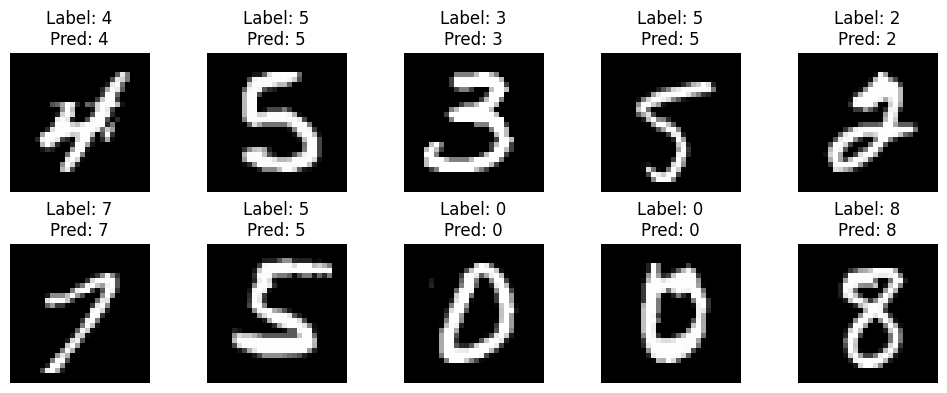

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x_train, y_train_cat, batch_size=128, epochs=5, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test_cat)
print(f'\nTest accuracy: {acc:.4f}')

# Visualisasi hasil prediksi
pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)

# Tampilkan 10 gambar dengan prediksi
plt.figure(figsize=(10, 4))
for i in range(10):
    index = np.random.randint(0, len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_test[index]}\nPred: {pred_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
